In [78]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import stats
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [79]:
pools = ['Pool_49', 'Pool_52', 'Pool_60']

## Distribution of DeepNovo scores

In [80]:
data_frames = []
for p in pools:
    df = pd.read_csv(f'../../Data/ScoringResults/{p}/deepnovo_scored.tsv', sep='\t', header=0, index_col=None)
    # append pool name to the dataframe
    df['Pool'] = ' '.join(p.split('_'))
    data_frames.append(df)
df = pd.concat(data_frames, axis=0, ignore_index=True)

print(df['Score'].describe())

count    82925.000000
mean        -0.268927
std          0.261403
min         -3.280000
25%         -0.430000
50%         -0.210000
75%         -0.040000
max         -0.000000
Name: Score, dtype: float64


## Correlation between DeepNovo score and other metrics

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


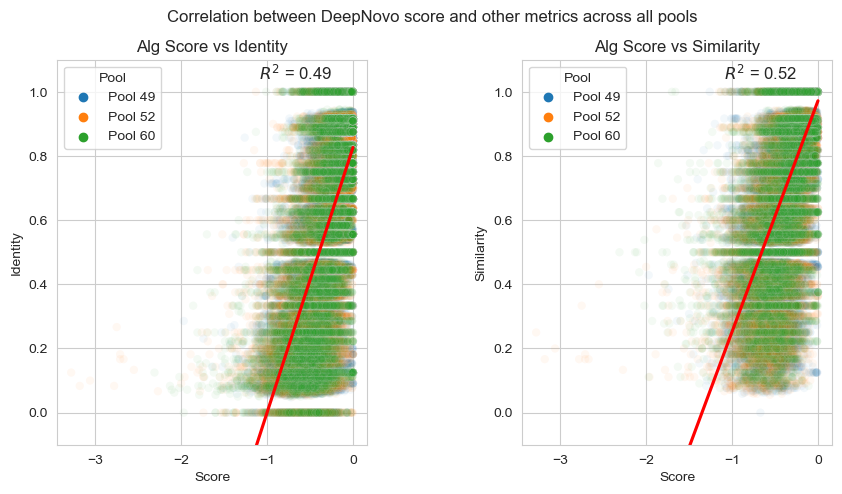

In [83]:
data_frames = []
for p in pools:
    df = pd.read_csv(f'../../Data/ScoringResults/{p}/deepnovo_scored.tsv', sep='\t', header=0, index_col=None)
    # append pool name to the dataframe
    df['Pool'] = ' '.join(p.split('_'))
    data_frames.append(df)
df = pd.concat(data_frames, axis=0, ignore_index=True)

fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw={'hspace': 0.5, 'wspace': 0.5})
fig.set_size_inches(10, 5)
fig.suptitle('Correlation between DeepNovo score and other metrics across all pools')
ax0, ax1 = ax.flatten()

ax0 = sns.regplot(x='Score', y='Identity', scatter=False , data=df, ax=ax0, line_kws={'color': 'red'})
ax0 = sns.scatterplot(x='Score', y='Identity', data=df, ax=ax0, hue='Pool', alpha=0.05)
ax0.set(ylim=(-0.1, 1.1))
ax0.set_title('Alg Score vs Identity')
# Calculating R-squared
_, _, r_value, _, _ = stats.linregress(df['Score'], df['Identity'])
r_squared = r_value ** 2

# Annotating plot with R-squared value
ax0.annotate(f'$R^2$ = {r_squared:.2f}', xy=(0.65, 0.95), xycoords='axes fraction', fontsize=12)


ax1 = sns.regplot(x='Score', y='Similarity', scatter=False, data=df, ax=ax1, line_kws={'color': 'red'})
ax1 = sns.scatterplot(x='Score', y='Similarity', data=df, ax=ax1, hue='Pool', alpha=0.05)

ax1.set(ylim=(-0.1, 1.1))
ax1.set_title('Alg Score vs Similarity')
# Calculating R-squared
_, _, r_value, _, _ = stats.linregress(df['Score'], df['Similarity'])
r_squared = r_value ** 2

# Annotating plot with R-squared value
ax1.annotate(f'$R^2$ = {r_squared:.2f}', xy=(0.65, 0.95), xycoords='axes fraction', fontsize=12)

fig.savefig(f'../../Data/Analysis/deepnovo_scores_correlation_all_pools.png')

## Distribution of Novor scores

In [89]:
data_frames = []
for p in pools:
    df = pd.read_csv(f'../../Data/ScoringResults/{p}/novor_scored.tsv', sep='\t', header=0, index_col=None)
    # append pool name to the dataframe
    df['Pool'] = ' '.join(p.split('_'))
    data_frames.append(df)
df = pd.concat(data_frames, axis=0, ignore_index=True)

print(df['Score'].describe())

count    96967.000000
mean        66.600778
std         25.705028
min          1.500000
25%         48.400000
50%         72.900000
75%         89.200000
max         99.400000
Name: Score, dtype: float64


## Correlation between Novor score and other metrics

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


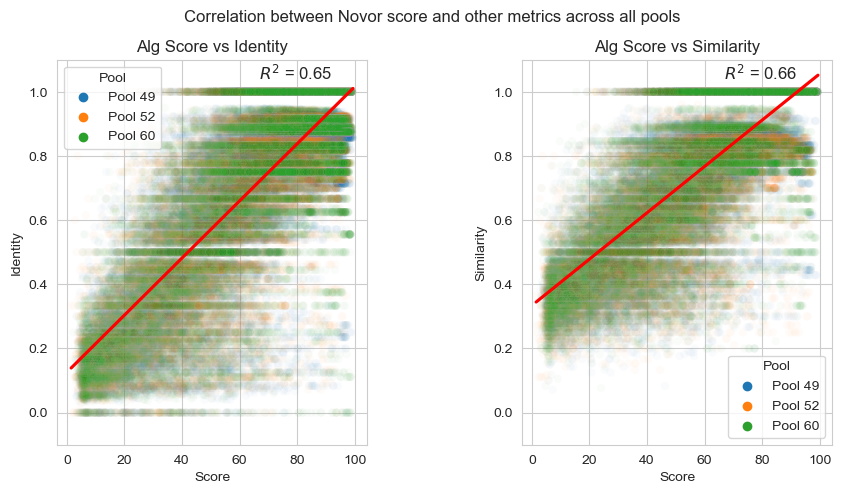

In [84]:
data_frames = []
colors = {'Pool_49':'darkorange', 'Pool_52':'royalblue', 'Pool_60':'#555555'}
for p in pools:
    df = pd.read_csv(f'../../Data/ScoringResults/{p}/novor_scored.tsv', sep='\t', header=0, index_col=None)
    # append pool name to the dataframe
    df['Pool'] = ' '.join(p.split('_'))
    data_frames.append(df)
df = pd.concat(data_frames, axis=0, ignore_index=True)

fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw={'hspace': 0.5, 'wspace': 0.5})
fig.set_size_inches(10, 5)
fig.suptitle('Correlation between Novor score and other metrics across all pools')
ax0, ax1 = ax.flatten()

ax0 = sns.regplot(x='Score', y='Identity', scatter=False , data=df, ax=ax0, line_kws={'color': 'red'})
ax0 = sns.scatterplot(x='Score', y='Identity', data=df, ax=ax0, hue='Pool', alpha=0.025)
ax0.set(ylim=(-0.1, 1.1))
ax0.set_title('Alg Score vs Identity')
# Calculating R-squared
_, _, r_value, _, _ = stats.linregress(df['Score'], df['Identity'])
r_squared = r_value ** 2

# Annotating plot with R-squared value
ax0.annotate(f'$R^2$ = {r_squared:.2f}', xy=(0.65, 0.95), xycoords='axes fraction', fontsize=12)


ax1 = sns.regplot(x='Score', y='Similarity', scatter=False, data=df, ax=ax1, line_kws={'color': 'red'})
ax1 = sns.scatterplot(x='Score', y='Similarity', data=df, ax=ax1, hue='Pool', alpha=0.025)

ax1.set(ylim=(-0.1, 1.1))
ax1.set_title('Alg Score vs Similarity')
# Calculating R-squared
_, _, r_value, _, _ = stats.linregress(df['Score'], df['Similarity'])
r_squared = r_value ** 2

# Annotating plot with R-squared value
ax1.annotate(f'$R^2$ = {r_squared:.2f}', xy=(0.65, 0.95), xycoords='axes fraction', fontsize=12)

fig.savefig(f'../../Data/Analysis/novor_scores_correlation_all_pools.png')

## Distribution of Peaks scores

In [85]:
data_frames = []
for p in pools:
    df = pd.read_csv(f'../../Data/ScoringResults/{p}/peaks_scored.tsv', sep='\t', header=0, index_col=None)
    # append pool name to the dataframe
    df['Pool'] = ' '.join(p.split('_'))
    df['Score'] = df['Score'] / 100
    data_frames.append(df)
df = pd.concat(data_frames, axis=0, ignore_index=True)

print(df['Score'].describe())

count    88876.000000
mean         0.826364
std          0.147324
min          0.498750
25%          0.710000
50%          0.870000
75%          0.960000
max          1.000000
Name: Score, dtype: float64


## Correlation between Peaks score and other metrics

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


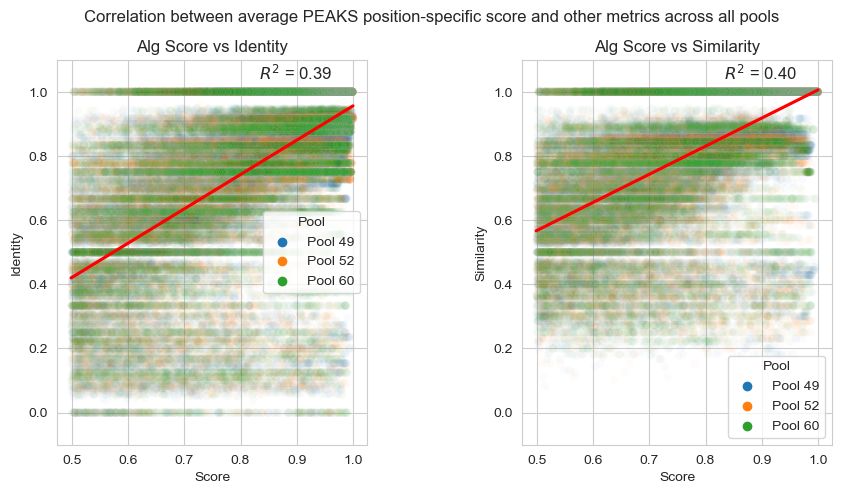

In [86]:
data_frames = []
for p in pools:
    df = pd.read_csv(f'../../Data/ScoringResults/{p}/peaks_scored.tsv', sep='\t', header=0, index_col=None)
    # append pool name to the dataframe
    df['Pool'] = ' '.join(p.split('_'))
    df['Score'] = df['Score'] / 100
    data_frames.append(df)
df = pd.concat(data_frames, axis=0, ignore_index=True)

fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw={'hspace': 0.5, 'wspace': 0.5})
fig.set_size_inches(10, 5)
fig.suptitle('Correlation between average PEAKS position-specific score and other metrics across all pools')
ax0, ax1 = ax.flatten()

ax0 = sns.regplot(x='Score', y='Identity', scatter=False , data=df, ax=ax0, line_kws={'color': 'red'})
ax0 = sns.scatterplot(x='Score', y='Identity', data=df, ax=ax0, hue='Pool', alpha=0.025)
ax0.set(ylim=(-0.1, 1.1))
ax0.set_title('Alg Score vs Identity')
# Calculating R-squared
_, _, r_value, _, _ = stats.linregress(df['Score'], df['Identity'])
r_squared = r_value ** 2

# Annotating plot with R-squared value
ax0.annotate(f'$R^2$ = {r_squared:.2f}', xy=(0.65, 0.95), xycoords='axes fraction', fontsize=12)


ax1 = sns.regplot(x='Score', y='Similarity', scatter=False, data=df, ax=ax1, line_kws={'color': 'red'})
ax1 = sns.scatterplot(x='Score', y='Similarity', data=df, ax=ax1, hue='Pool', alpha=0.025)

ax1.set(ylim=(-0.1, 1.1))
ax1.set_title('Alg Score vs Similarity')
# Calculating R-squared
_, _, r_value, _, _ = stats.linregress(df['Score'], df['Similarity'])
r_squared = r_value ** 2

# Annotating plot with R-squared value
ax1.annotate(f'$R^2$ = {r_squared:.2f}', xy=(0.65, 0.95), xycoords='axes fraction', fontsize=12)

fig.savefig(f'../../Data/Analysis/peaks_scores_correlation_all_pools.png')

## Distribution of DirecTag scores

In [91]:
data_frames = []
for p in pools:
    df = pd.read_csv(f'../../Data/ScoringResults/{p}/direcTag_scored_grouped.tsv', sep='\t', header=0, index_col=None)
    # append pool name to the dataframe
    df['Pool'] = ' '.join(p.split('_'))
    data_frames.append(df)
df = pd.concat(data_frames, axis=0, ignore_index=True)

print(df['Score'].describe())

count    81232.000000
mean         0.216325
std          0.657611
min          0.000000
25%          0.000794
50%          0.012686
75%          0.106892
max         15.774095
Name: Score, dtype: float64


## Correlation between DirecTag score and other metrics

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


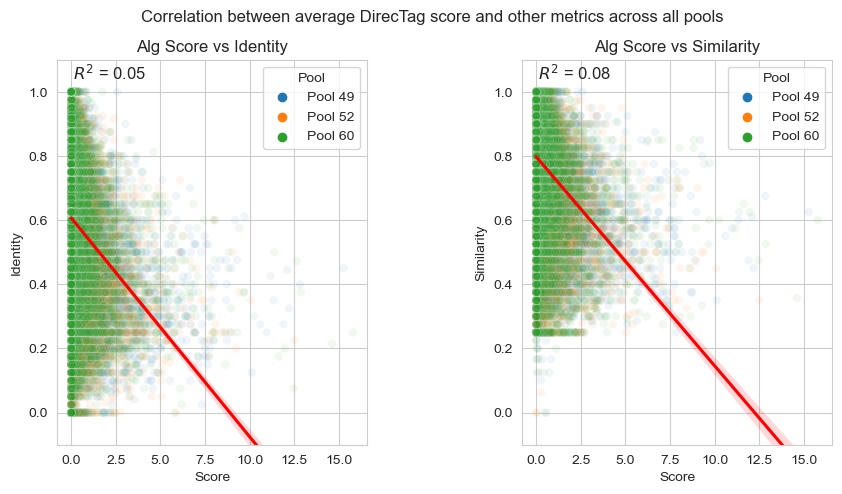

In [90]:
data_frames = []
colors = {'Pool_49':'darkorange', 'Pool_52':'royalblue', 'Pool_60':'#555555'}
for p in pools:
    df = pd.read_csv(f'../../Data/ScoringResults/{p}/direcTag_scored_grouped.tsv', sep='\t', header=0, index_col=None)
    # append pool name to the dataframe
    df['Pool'] = ' '.join(p.split('_'))
    data_frames.append(df)
df = pd.concat(data_frames, axis=0, ignore_index=True)

fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw={'hspace': 0.5, 'wspace': 0.5})
fig.set_size_inches(10, 5)
fig.suptitle('Correlation between average DirecTag score and other metrics across all pools')
ax0, ax1 = ax.flatten()

ax0 = sns.regplot(x='Score', y='Identity', scatter=False , data=df, ax=ax0, line_kws={'color': 'red'})
ax0 = sns.scatterplot(x='Score', y='Identity', data=df, ax=ax0, hue='Pool', alpha=0.07)
ax0.set(ylim=(-0.1, 1.1))
ax0.set_title('Alg Score vs Identity')
# Calculating R-squared
_, _, r_value, _, _ = stats.linregress(df['Score'], df['Identity'])
r_squared = r_value ** 2

# Annotating plot with R-squared value
ax0.annotate(f'$R^2$ = {r_squared:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)


ax1 = sns.regplot(x='Score', y='Similarity', scatter=False, data=df, ax=ax1, line_kws={'color': 'red'})
ax1 = sns.scatterplot(x='Score', y='Similarity', data=df, ax=ax1, hue='Pool', alpha=0.07)

ax1.set(ylim=(-0.1, 1.1))
ax1.set_title('Alg Score vs Similarity')
# Calculating R-squared
_, _, r_value, _, _ = stats.linregress(df['Score'], df['Similarity'])
r_squared = r_value ** 2

# Annotating plot with R-squared value
ax1.annotate(f'$R^2$ = {r_squared:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

fig.savefig(f'../../Data/Analysis/direcTag_scores_correlation_all_pools.png')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


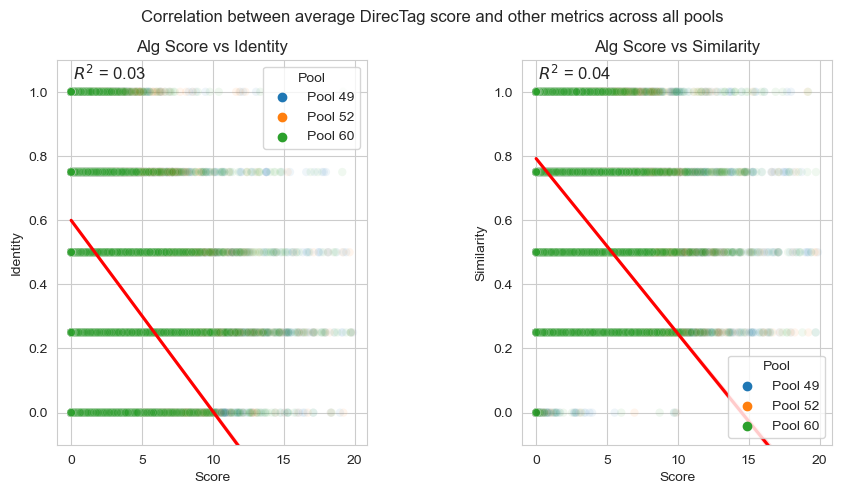

In [92]:
data_frames = []
colors = {'Pool_49':'darkorange', 'Pool_52':'royalblue', 'Pool_60':'#555555'}
for p in pools:
    df = pd.read_csv(f'../../Data/ScoringResults/{p}/direcTag_scored.tsv', sep='\t', header=0, index_col=None)
    # append pool name to the dataframe
    df['Pool'] = ' '.join(p.split('_'))
    data_frames.append(df)
df = pd.concat(data_frames, axis=0, ignore_index=True)

fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw={'hspace': 0.5, 'wspace': 0.5})
fig.set_size_inches(10, 5)
fig.suptitle('Correlation between average DirecTag score and other metrics across all pools')
ax0, ax1 = ax.flatten()

ax0 = sns.regplot(x='Score', y='Identity', scatter=False , data=df, ax=ax0, line_kws={'color': 'red'})
ax0 = sns.scatterplot(x='Score', y='Identity', data=df, ax=ax0, hue='Pool', alpha=0.07)
ax0.set(ylim=(-0.1, 1.1))
ax0.set_title('Alg Score vs Identity')
# Calculating R-squared
_, _, r_value, _, _ = stats.linregress(df['Score'], df['Identity'])
r_squared = r_value ** 2

# Annotating plot with R-squared value
ax0.annotate(f'$R^2$ = {r_squared:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)


ax1 = sns.regplot(x='Score', y='Similarity', scatter=False, data=df, ax=ax1, line_kws={'color': 'red'})
ax1 = sns.scatterplot(x='Score', y='Similarity', data=df, ax=ax1, hue='Pool', alpha=0.07)

ax1.set(ylim=(-0.1, 1.1))
ax1.set_title('Alg Score vs Similarity')
# Calculating R-squared
_, _, r_value, _, _ = stats.linregress(df['Score'], df['Similarity'])
r_squared = r_value ** 2

# Annotating plot with R-squared value
ax1.annotate(f'$R^2$ = {r_squared:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

fig.savefig(f'../../Data/Analysis/direcTag_scores_correlation_all_pools.png')